# Introdcution

The dataset: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

This dataset contains almost 17000 data points of bike rentals gathered in europe. Where we also have data points about several weather conditions. Based on these conditions we will try to figure out how weather affects the bike rental count for different type of users. 

Also, secondarily, we will try to figure out how to train models that will allow us to predict or forecast demand of bike rental. 

## The Approach

1. To use the dataset to its full potential we will be doing Exploratory Data Analysis.
    a. Based on the EDA we decide whether to edit any aspect of the dataset
2. Then we will try to figure out statistical inferences that will direct us to the models and evaluations we need. 
3. We train the dataset with a few approach. 
4. We evaulate the models to see what works the best. 

> Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Checking the dataset

In [2]:
data_day = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')

In [3]:
print(data_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
print(data_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


> Merging the Dataset

In [9]:
data_hour_subset = data_hour[['dteday', 'hr']]
merged_df = pd.merge(data_day, data_hour_subset, on='dteday', how='inner')

In [10]:
merged_df.to_csv('merged_data.csv', index=False)

In [11]:
print(merged_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        1  2011-01-01       1   0     1        0        6           0   
2        1  2011-01-01       1   0     1        0        6           0   
3        1  2011-01-01       1   0     1        0        6           0   
4        1  2011-01-01       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  hr  
0  985   0  
1  985   1  
2  985   2  
3  985   3  
4  985   4  


In [12]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
 16  hr          17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.4+ MB
None


In [13]:
print(merged_df.describe())

            instant        season            yr          mnth       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean     367.172622      2.501640      0.502561      6.537775      0.028770   
std      210.072051      1.106918      0.500008      3.438776      0.167165   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%      185.000000      2.000000      0.000000      4.000000      0.000000   
50%      367.000000      3.000000      1.000000      7.000000      0.000000   
75%      549.000000      3.000000      1.000000     10.000000      0.000000   
max      731.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.391680      0.496987      0.475775   
std        2.005771      0.465431      0.540501    

## Exploratory Data Analysis

> Distribution of the target variable 'cnt' (bike rent count)

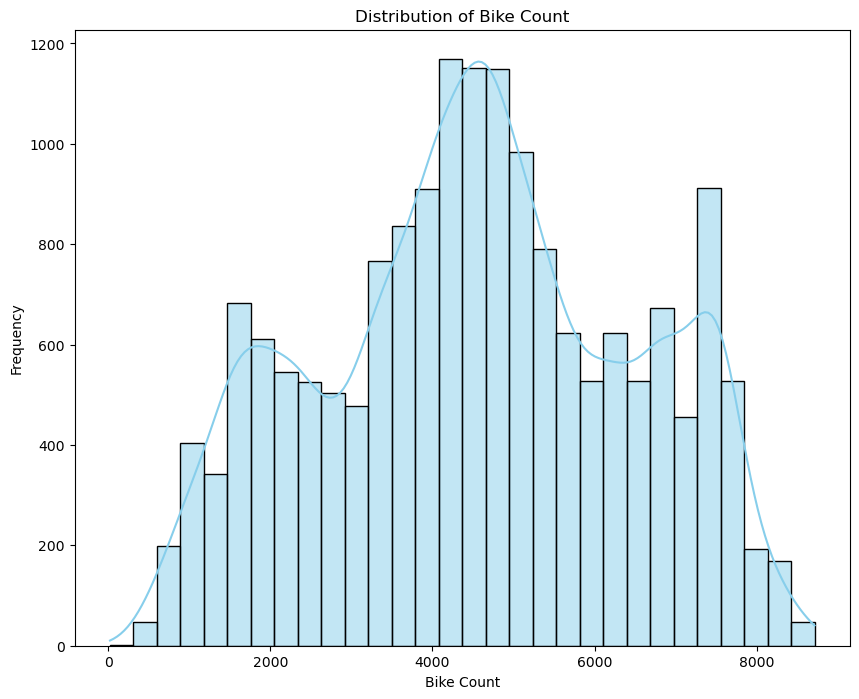

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(merged_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bike Count')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.show()

> Distribution of numerical features

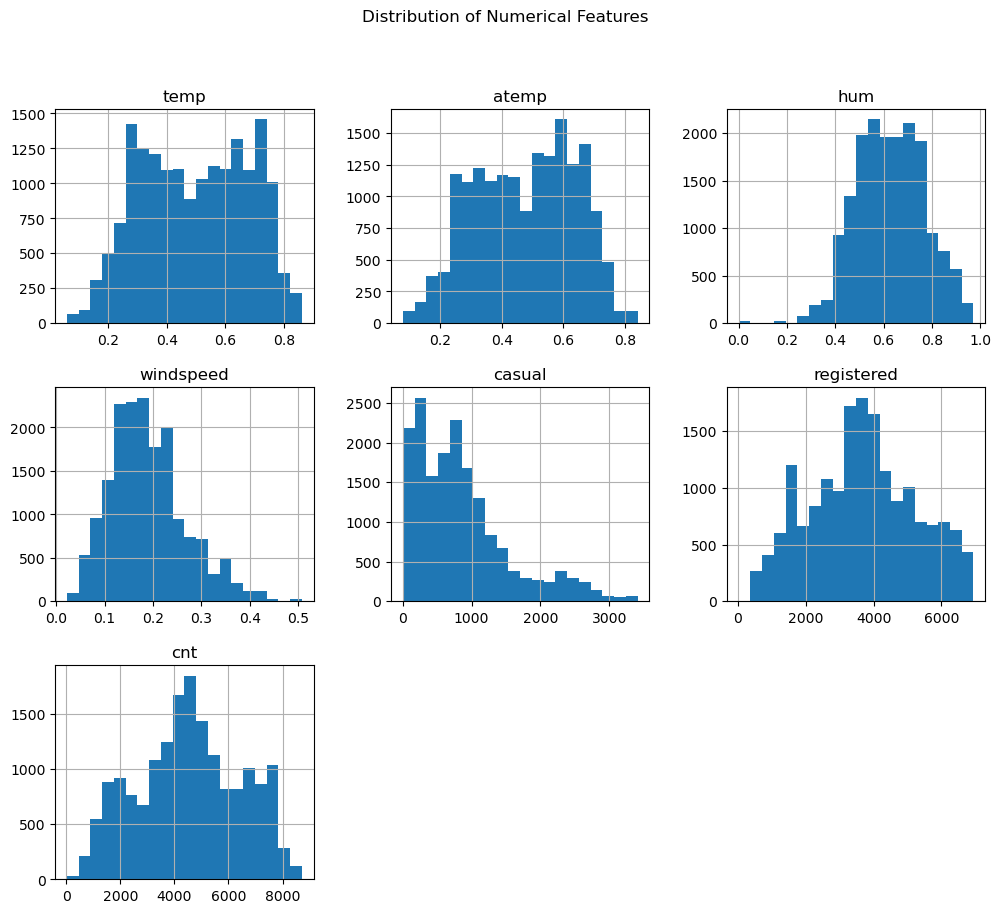

In [15]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
merged_df[numeric_features].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

> Correlation Matrix/ Heatmap to understand the correlation of the Target and Independant variables

/var/folders/5k/zvprcfvx20q_s8_frsffntyh0000gn/T/ipykernel_21156/2399077935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


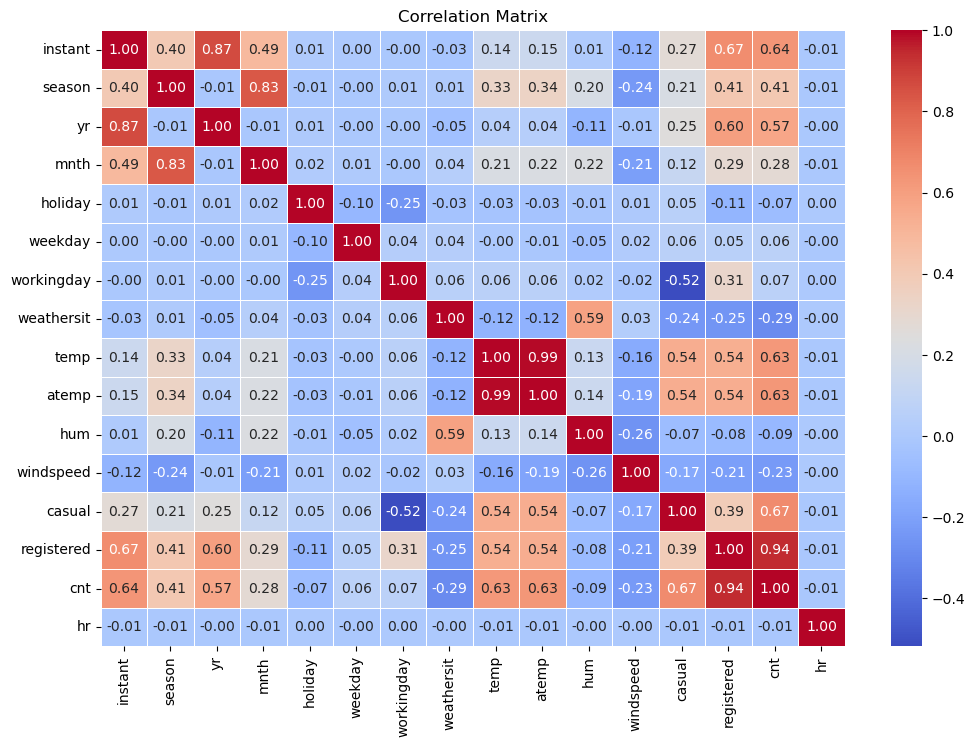

In [16]:
corr_matrix = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> Use of bike based on weather conditions: Clear (1), Few Clouds (2), Partly Cloudy (3)

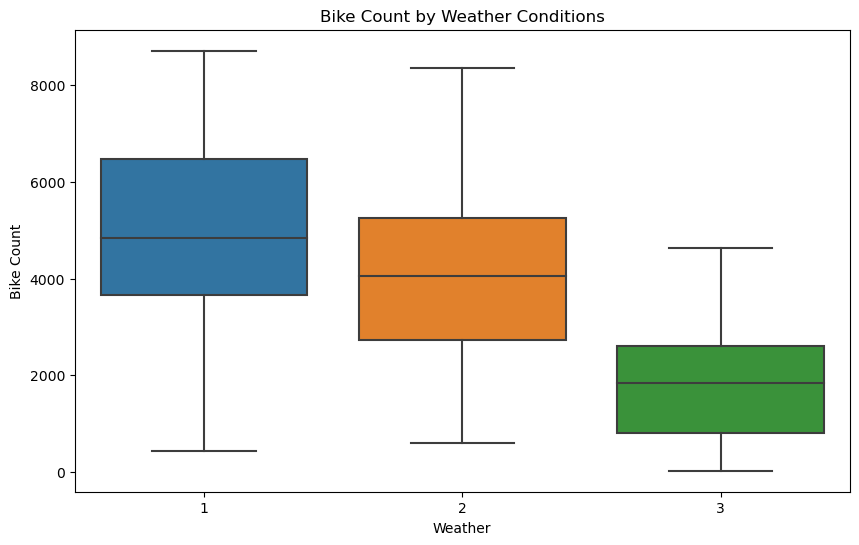

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=merged_df)
plt.title('Bike Count by Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Bike Count')
plt.show()

> Bike use based on Season: Winter(1), Spring(2), Summer(3), Fall(4)

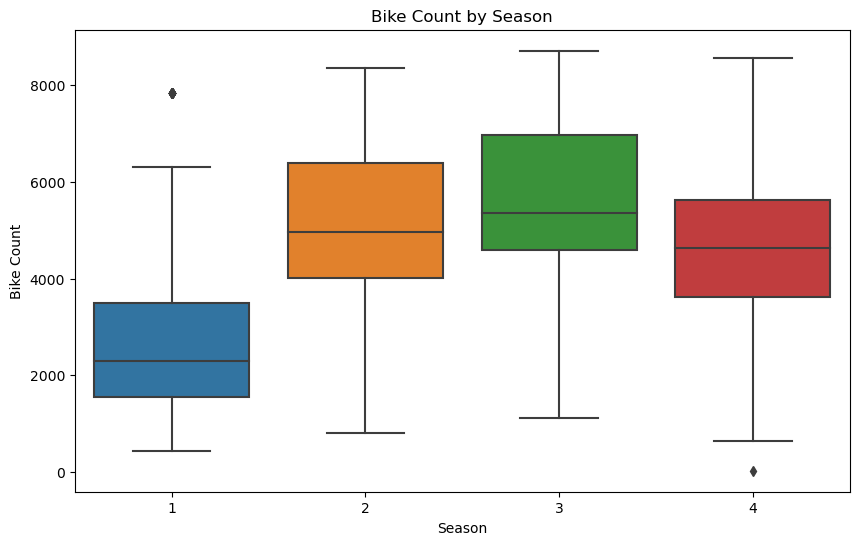

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=merged_df)
plt.title('Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.show()

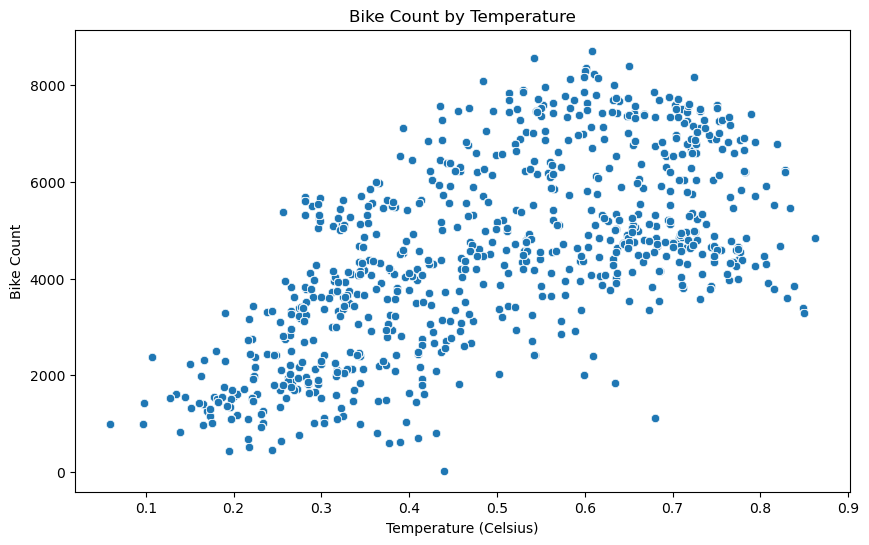

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=merged_df)
plt.title('Bike Count by Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Count')
plt.show()

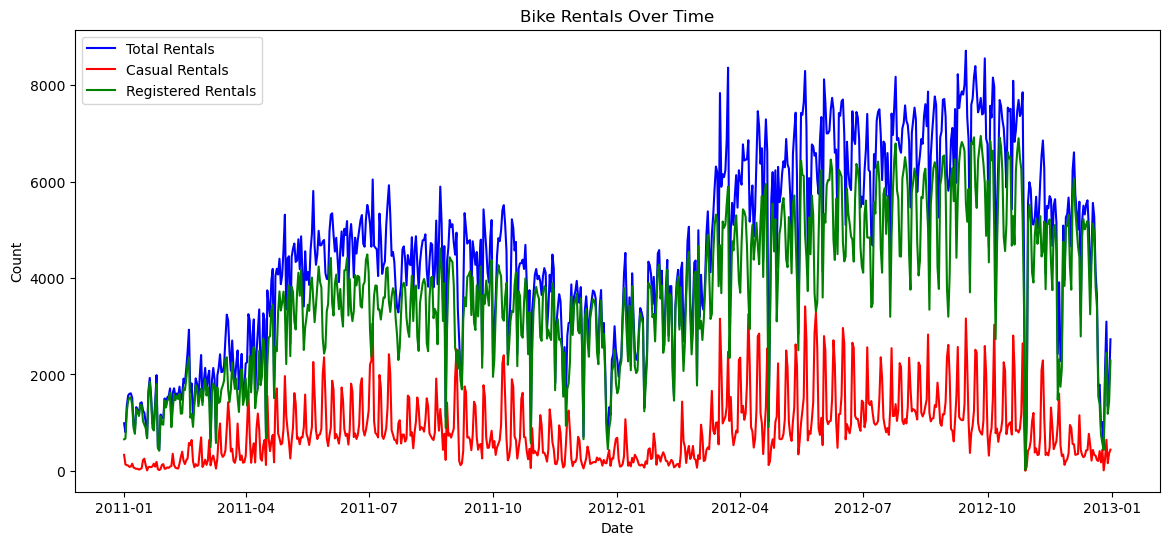

In [16]:
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])
plt.figure(figsize=(14, 6))
plt.plot(merged_df['dteday'], merged_df['cnt'], color='b', label='Total Rentals')
plt.plot(merged_df['dteday'], merged_df['casual'], color='r', label='Casual Rentals')
plt.plot(merged_df['dteday'], merged_df['registered'], color='g', label='Registered Rentals')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Bike Rentals Over Time')
plt.legend()
plt.show()

In [ ]:
print(merged_df.isnull().sum())

## ML Models

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

> Linear Regression Model

In [18]:
X = merged_df[['temp', 'atemp', 'hum', 'windspeed',]]
y = merged_df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1950275.8489458773


In [19]:
# Calculate the mean or median of the target variable
baseline_prediction = np.mean(y_train)  # Change to np.median(y_train) if you want to use the median

# Create an array of baseline predictions with the same length as the test set
baseline_predictions = np.full_like(y_test, fill_value=baseline_prediction)

# Calculate the MSE of the baseline model
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print('Mean Squared Error of the Baseline Model:', baseline_mse)

Mean Squared Error of the Baseline Model: 3599092.6570771


#### The comparison of MSEs of the Actual model and the baseline model tells us the Regression model we built initially has a lower MSE. Hence should be more accurate. 

In [20]:
# Include weather-related columns in the feature set (X)
X = merged_df.drop(['dteday', 'cnt'], axis=1)  # Exclude 'dteday' (date) and 'cnt' (target variable)

# Split the data into features (X) and target variable (y)
X = X[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = merged_df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0018025891829688927
Mean Absolute Error (MAE): 0.001018411967779046
Root Mean Squared Error (RMSE): 0.04245690971996069


## Interpreatation

> Interpreting these evaluation metrics:
The low values of MSE, MAE, and RMSE indicate that the Random Forest Regression model performs well in predicting bike rentals based on the given features and historical data.
The RMSE value provides a sense of scale for the errors in the model's predictions. In this case, an RMSE of 0.0424 suggests that, on average, the model's predictions are around 0.0424 units away from the actual values.
Overall, these metrics suggest that the model is effective in capturing the underlying patterns in the data and making accurate predictions for bike rentals.